# What is the most common type of surface used in tournaments?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)



tournament_dataframe = pd.DataFrame()
for file in os.listdir("raw/tournament_parquet"):
    single_stats = pd.read_parquet("raw/tournament_parquet/" + file)
    tournament_dataframe = pd.concat([tournament_dataframe, single_stats], axis= 'rows', ignore_index=True)

tournament_dataframe.head(10)

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11673958,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
1,11673962,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
2,11673963,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
3,11673993,121451,"Braga, Portugal",braga-portugal,None,Challenger,challenger,163,Red clay,75,False,False,False,False,0,2
4,11674000,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
5,11674008,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
6,11674011,121453,"Charleston, USA",charleston-usa,None,Challenger,challenger,71,Hardcourt outdoor,75,False,False,False,False,0,2
7,11674026,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2
8,11674032,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2
9,11674034,121456,"Orleans, France",orleans-france,None,Challenger,challenger,181,Hardcourt indoor,125,False,False,False,False,0,2


In [2]:
# حذف مقادیر نال از ستون ground_type
tournament_dataframe_cleaned = tournament_dataframe.dropna(subset=['ground_type'])

# گروه‌بندی بر اساس ground_type و شمارش تعداد هر نوع سطح
surface_count = tournament_dataframe_cleaned['ground_type'].value_counts()

# نمایش رایج‌ترین نوع سطح
most_common_surface = surface_count.idxmax()
count_most_common_surface = surface_count.max()

print(f"The most common type of surface is: {most_common_surface} with {count_most_common_surface} tournaments.")


The most common type of surface is: Hardcourt outdoor with 336 tournaments.


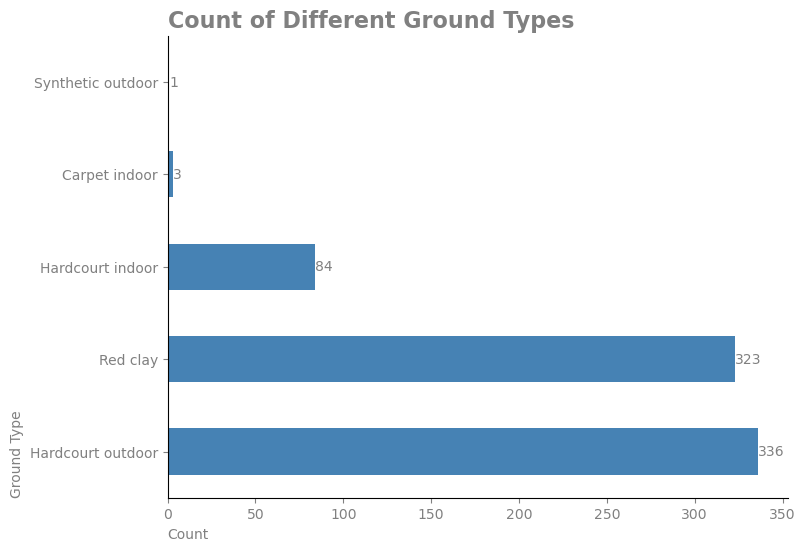

In [3]:
import matplotlib.pyplot as plt

# حذف مقادیر نال از ستون ground_type
tournament_dataframe_cleaned = tournament_dataframe.dropna(subset=['ground_type'])

# شمارش تعداد هر نوع سطح
surface_count = tournament_dataframe_cleaned['ground_type'].value_counts()

# رسم نمودار میله‌ای افقی
plt.figure(figsize=(8,6))
surface_count.plot(kind='barh', color='#4682b4')
plt.title('Count of Different Ground Types', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Count', fontsize=10, color='gray', loc = 'left')
plt.ylabel('Ground Type', fontsize=10, color='gray', loc='bottom')
plt.tick_params(colors='gray')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

for index, value in enumerate(surface_count):
    plt.text(value, index, str(value), color='gray', va='center')

plt.show()
